In [41]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
import numpy as np
import xgboost as xgb
import os
import time
import math
import json

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, learning_curve




### Data import

In [6]:
df_att1 = pd.read_csv("../dataset/Physical dataset/phy_att_1.csv", encoding = 'UTF-16', sep="\t")
df_att2 = pd.read_csv("../dataset/Physical dataset/phy_att_2.csv", encoding = 'UTF-16', sep="\t")
df_att3 = pd.read_csv("../dataset/Physical dataset/phy_att_3.csv", encoding = 'UTF-16', sep="\t")
df_att4 = pd.read_csv("../dataset/Physical dataset/phy_att_4.csv", sep=",")
df_norm = pd.read_csv("../dataset/Physical dataset/phy_norm.csv", encoding = 'UTF-16', sep="\t")


df_att1.name = "df_att1"
df_att2.name = "df_att2"
df_att3.name = "df_att3"
df_att4.name = "df_att4"
df_norm.name = "df_norm"

df_list = [df_norm, df_att1, df_att2, df_att3, df_att4]



In [7]:
# Function to run fucntion on each dataset
def df_all_fn(func):
    for df in df_list:
        print("\n" + df.name + " -------------------------------------")
        func(df)

### Data cleaning

In [8]:
df_list[2].rename(columns={"Lable_n": "Label_n"}, inplace= True)
df_list[2]['Label'].replace('nomal', 'normal', inplace=True)


for i, df in enumerate(df_list):
    df_list[i]["Label_n"] = df_list[i]["Label_n"].astype(bool)

### Exploratory data analysis

In [9]:

def info(df):
    print(df.info())

df_all_fn(info)


df_norm -------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3428 entries, 0 to 3427
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Time           3428 non-null   object
 1   Tank_1         3428 non-null   int64 
 2   Tank_2         3428 non-null   int64 
 3   Tank_3         3428 non-null   int64 
 4   Tank_4         3428 non-null   int64 
 5   Tank_5         3428 non-null   int64 
 6   Tank_6         3428 non-null   int64 
 7   Tank_7         3428 non-null   int64 
 8   Tank_8         3428 non-null   int64 
 9   Pump_1         3428 non-null   bool  
 10  Pump_2         3428 non-null   bool  
 11  Pump_3         3428 non-null   bool  
 12  Pump_4         3428 non-null   bool  
 13  Pump_5         3428 non-null   bool  
 14  Pump_6         3428 non-null   bool  
 15  Flow_sensor_1  3428 non-null   int64 
 16  Flow_sensor_2  3428 non-null   int64 
 17  Flow_sensor_3  3428 non-

In [10]:
def head(df):
    print(df.head())

df_all_fn(head)


df_norm -------------------------------------
                  Time  Tank_1  Tank_2  Tank_3  Tank_4  Tank_5  Tank_6  \
0  09/04/2021 11:30:50       0       0       0       0       0       0   
1  09/04/2021 11:30:51       0       0       0       0       0       0   
2  09/04/2021 11:30:52       0       0       0       0       0       0   
3  09/04/2021 11:30:53       0       0       0       0       0       0   
4  09/04/2021 11:30:54       0       0       0       0       0       0   

   Tank_7  Tank_8  Pump_1  ...  Valv_15  Valv_16  Valv_17  Valv_18  Valv_19  \
0       0       0   False  ...    False    False    False    False    False   
1       0       0   False  ...    False    False    False    False    False   
2       0       0   False  ...    False    False    False    False    False   
3       0       0   False  ...    False    False    False    False    False   
4       0       0   False  ...    False    False    False    False    False   

   Valv_20  Valv_21  Valv_22  Lab

In [11]:
def describe(df):
    print(df.describe())

df_all_fn(describe)


df_norm -------------------------------------
            Tank_1       Tank_2       Tank_3       Tank_4       Tank_5  \
count  3428.000000  3428.000000  3428.000000  3428.000000  3428.000000   
mean    710.314761   732.337223   597.789965   356.985123   368.955368   
std     663.274738   647.241518   467.890372   369.808391   271.544093   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000     5.000000     9.000000    31.750000    93.750000   
50%     621.500000   669.000000   621.000000   180.000000   384.000000   
75%    1284.250000  1292.250000  1018.000000   688.000000   604.250000   
max    1994.000000  1985.000000  1513.000000  1143.000000   831.000000   

            Tank_6       Tank_7       Tank_8  Flow_sensor_1  Flow_sensor_2  \
count  3428.000000  3428.000000  3428.000000    3428.000000    3428.000000   
mean    212.233081   183.305426   190.320595    1605.600933    1652.275379   
std     166.565724   185.233377   184.099894    1961

In [12]:
def count_label_n(df):
    print(df['Label_n'].value_counts())
    label_n_ratio = df["Label_n"].value_counts(normalize=True)
    print()
    print(label_n_ratio * 100)

df_all_fn(count_label_n)


df_norm -------------------------------------
Label_n
False    3428
Name: count, dtype: int64

Label_n
False    100.0
Name: proportion, dtype: float64

df_att1 -------------------------------------
Label_n
False    1610
True      810
Name: count, dtype: int64

Label_n
False    66.528926
True     33.471074
Name: proportion, dtype: float64

df_att2 -------------------------------------
Label_n
False    1798
True      306
Name: count, dtype: int64

Label_n
False    85.456274
True     14.543726
Name: proportion, dtype: float64

df_att3 -------------------------------------
Label_n
False    911
True     343
Name: count, dtype: int64

Label_n
False    72.647528
True     27.352472
Name: proportion, dtype: float64

df_att4 -------------------------------------
Label_n
False    1159
True      558
Name: count, dtype: int64

Label_n
False    67.501456
True     32.498544
Name: proportion, dtype: float64


In [13]:
def print_attack_labels(df):
    print(df["Label"].unique())

print("Attack types: ")
df_all_fn(print_attack_labels)

Attack types: 

df_norm -------------------------------------
['normal']

df_att1 -------------------------------------
['normal' 'MITM' 'physical fault']

df_att2 -------------------------------------
['normal' 'scan' 'DoS' 'physical fault' 'MITM']

df_att3 -------------------------------------
['normal' 'physical fault' 'DoS' 'MITM']

df_att4 -------------------------------------
['normal' 'scan' 'DoS' 'physical fault' 'MITM']


In [14]:
def plot_atack_time(df):
    fig = px.line(df, x='Time', y='Label')
    fig.show()

df_all_fn(plot_atack_time)



df_norm -------------------------------------



df_att1 -------------------------------------



df_att2 -------------------------------------



df_att3 -------------------------------------



df_att4 -------------------------------------


Fusion des données

In [15]:
df_fusion = pd.concat(df_list, ignore_index=True)

### Prétraitement pour aprentissage

#### toutes les données

In [16]:
# Flow sensor 3 toujours à False

df_all = df_fusion.drop(columns=['Time', 'Flow_sensor_3'])

df_all_bool = df_all.select_dtypes('bool')
df_all_bool= df_all_bool.drop(columns=['Label_n'])

df_all_numeric = df_all.select_dtypes('int64')

scaler = MinMaxScaler()
df_all_numeric = pd.DataFrame(scaler.fit_transform(df_all_numeric), columns=df_all_numeric.columns)

df_all_bin= df_all_bool.astype(int)


X= pd.concat([df_all_numeric,df_all_bin], axis=1)

Y = df_all[['Label']] 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
Y_test_svm=np.ravel(Y_test) 
Y_train_svm=np.ravel(Y_train)

# Specific Y for SVM, does not accpept ont hot encoding
Y_train= pd.get_dummies(Y_train, columns=['Label'])
Y_test= pd.get_dummies(Y_test, columns=['Label'])

DataSet_all={"X_train": X_train, "X_test":X_test, "Y_train":Y_train, "Y_test":Y_test,'Y_train_svm':Y_train_svm,'Y_test_svm':Y_test_svm}

Y['Label'].value_counts()

Label
normal            8906
MITM              1008
physical fault     685
DoS                310
scan                14
Name: count, dtype: int64

#### données sans label scan, la papier stipule que les scans n'ont pas d'éffets sur le df physique

In [17]:
df_noscan = df_fusion[df_fusion['Label'] != 'scan']
df_noscan = df_noscan.reset_index(drop=True)

df_noscan = df_noscan.drop(columns=['Time', 'Flow_sensor_3'])
df_noscan_bool = df_noscan.select_dtypes('bool')
df_noscan_bool = df_noscan_bool.drop(columns=['Label_n'])

df_noscan_numeric = df_noscan.select_dtypes('int64')

scaler = MinMaxScaler()
df_noscan_numeric = pd.DataFrame(scaler.fit_transform(df_noscan_numeric), columns=df_noscan_numeric.columns)

df_noscan_bin = df_noscan_bool.astype(int)


X_noscan = pd.concat([df_noscan_numeric, df_noscan_bin], axis=1)

Y_noscan = df_noscan[['Label']]
X_train_noscan, X_test_noscan, Y_train_noscan, Y_test_noscan = train_test_split(X_noscan, Y_noscan, test_size=0.2, random_state=42)
Y_test_svm_noscan=np.ravel(Y_test_noscan) 
Y_train_svm_noscan=np.ravel(Y_train_noscan)

# Specific Y for SVM, does not accpept ont hot encoding
Y_train_noscan= pd.get_dummies(Y_train_noscan, columns=['Label'])
Y_test_noscan= pd.get_dummies(Y_test_noscan, columns=['Label'])
DataSet_noscan={"X_train": X_train_noscan, "X_test":X_test_noscan, "Y_train":Y_train_noscan, "Y_test":Y_test_noscan,'Y_train_svm':Y_train_svm_noscan,'Y_test_svm':Y_test_svm_noscan}

Y_noscan['Label'].value_counts()

Label
normal            8906
MITM              1008
physical fault     685
DoS                310
Name: count, dtype: int64

#### données sans label scan et sans intervalles certaines de temps, la papier stipule que certaines attaques DoS et MIM n'ont auccon effets sur le dataset physique, rien n'est stipulé pour le dataset 4 donc il est retiré.

In [18]:
df_list_wo4 = [df_norm, df_att1, df_att2, df_att3]
df_fusion_wo4 = pd.concat(df_list_wo4, ignore_index=True)

df_fusion_wo4_noscan = df_fusion_wo4[df_fusion_wo4['Label'] != 'scan']
df_fusion_wo4_noscan = df_fusion_wo4_noscan.reset_index(drop=True)

df_fusion_wo4_noscan['Time'] = pd.to_datetime(df_fusion_wo4_noscan['Time'])
df_drop = df_fusion_wo4_noscan[(df_fusion_wo4_noscan['Time'] < pd.to_datetime("09/04/2021 20:01:18")) | (df_fusion_wo4_noscan['Time'] > pd.to_datetime("09/04/2021  20:02:03"))]
df_drop = df_drop.reset_index(drop=True)

df_drop = df_drop[(df_drop['Time'] < pd.to_datetime("09/04/2021 15:59:57")) | (df_drop['Time'] > pd.to_datetime("09/04/2021  16:00:10"))]
df_drop = df_drop.reset_index(drop=True)

df_drop = df_drop[(df_drop['Time'] < pd.to_datetime("09/04/2021 19:45:52")) | (df_drop['Time'] > pd.to_datetime("09/04/2021 19:46:21"))]
df_drop = df_drop.reset_index(drop=True)

df_drop = df_drop.drop(columns=['Time', 'Flow_sensor_3'])
df_drop_bool = df_drop.select_dtypes('bool')
df_drop_bool = df_drop_bool.drop(columns=['Label_n'])

df_drop_numeric = df_drop.select_dtypes('int64')

scaler = MinMaxScaler()
df_drop_numeric = pd.DataFrame(scaler.fit_transform(df_drop_numeric), columns=df_drop_numeric.columns)

df_drop_bin = df_drop_bool.astype(int)


X_drop = pd.concat([df_drop_numeric,df_drop_bin], axis=1)

Y_drop = df_drop[['Label']] 
X_train_drop, X_test_drop, Y_train_drop, Y_test_drop = train_test_split(X_drop, Y_drop, test_size=0.2, random_state=42)
Y_test_svm_drop=np.ravel(Y_test_drop) 
Y_train_svm_drop=np.ravel(Y_train_drop)

Y_train_drop= pd.get_dummies(Y_train_drop, columns=['Label'])
Y_test_drop= pd.get_dummies(Y_test_drop, columns=['Label'])
DataSet_drop={"X_train": X_train_drop, "X_test":X_test_drop, "Y_train":Y_train_drop, "Y_test":Y_test_drop,'Y_train_svm':Y_train_svm_drop,'Y_test_svm':Y_test_svm_drop}

Y_drop['Label'].value_counts()

ValueError: time data "19/04/2021 15:37:12" doesn't match format "%m/%d/%Y %H:%M:%S", at position 5848. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

KNN, CART, Random Forrest, 
XGBoost, SVM, MLP (and additionnal ones if you want)

In [37]:


def one_hot_to_label(one_hot_array):
    return np.argmax(one_hot_array, axis=1)

def plot_confusion_matrix(y_true, y_pred, classes, is_svm=False):
    if not is_svm:
        y_true = one_hot_to_label(y_true)
        y_pred = one_hot_to_label(y_pred)

    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(len(classes), len(classes)))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    
    plt.title('Matrice de Confusion')
    plt.xlabel('Valeurs Prédites')
    plt.ylabel('Valeurs Réelles')
    return plt

def plot_learning_curve_f1(estimator, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title("Courbes d'apprentissage")
    plt.xlabel("Taille de l'échantillon d'apprentissage")
    plt.ylabel("F1 score")
    # Utiliser la fonction learning_curve avec le paramètre scoring='f1_micro' pour calculer le f1 score moyen sur chaque sous-ensemble
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1_macro')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="F1 score sur l'ensemble d'apprentissage")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="F1 score sur l'ensemble de validation croisée")
    plt.legend(loc="best")
    return plt

In [38]:

def Models(model, dataset):
    resultat_model = {}
    
    start_fit = time.time()

    if model == 'cart':
        parameters = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
        Model_cart = GridSearchCV(tree.DecisionTreeClassifier(), parameters, cv=5)
        Model_cart.fit(dataset['X_train'], dataset['Y_train'])
        resultat_model['cart'] = Model_cart.best_estimator_

    elif model == 'xgb':
        parameters = {'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200]}
        Model_XGBC = GridSearchCV(xgb.XGBClassifier(), parameters, cv=5)
        Model_XGBC.fit(dataset['X_train'], dataset['Y_train'])
        resultat_model['xgb'] = Model_XGBC.best_estimator_

    elif model == 'knn':
        parameters = {'n_neighbors': [3, 5, 7]}
        Model_knn = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)
        Model_knn.fit(dataset['X_train'], dataset['Y_train'])
        resultat_model['knn'] = Model_knn.best_estimator_

    elif model == 'svm':
        Model_svm =SVC(kernel='poly', degree=5)
        Model_svm.fit(dataset['X_train'],dataset["Y_train_svm"])
        resultat_model['svm']=Model_svm
        
    elif model == 'mlp':
        parameters = {'hidden_layer_sizes': [(100,), (200,)]}
        Model_mlp = GridSearchCV(MLPClassifier(), parameters, cv=5)
        Model_mlp.fit(dataset['X_train'], dataset['Y_train'])
        resultat_model["mlp"] = Model_mlp.best_estimator_

    elif model == 'randomForest':
        parameters = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
        Model_rf = GridSearchCV(RandomForestClassifier(), parameters, cv=5)
        Model_rf.fit(dataset['X_train'], dataset['Y_train'])
        resultat_model['randomForest'] = Model_rf.best_estimator_

    else:
        print("Le nom du modèle doit être compris dans cette liste : {cart, xgb, knn, svm, mlp, randomForest}")
        
        
    end_fit = time.time()
    elapsed_time = math.floor(end_fit - start_fit) + 1

    return resultat_model, elapsed_time


#### Put training reports in ./results/phys folder

In [46]:
if not os.path.exists('results'):
    os.makedirs('results/phys/')

def evaluate_models(dataset, dataset_name):
        
    sizes = [100, 1000, 10000]
    if dataset_name == "all":
        label=['DoS', 'MITM', 'normal', 'physical fault', 'scan']
    else:
        label=['DoS', 'MITM', 'normal', 'physical fault']


    performance_results = {} # dictionnaire pour stocker les performances pour chaque modèle et chaque taille

    for size in sizes:
        
        subset_X_train = dataset['X_train'][:size]
        subset_Y_train = dataset['Y_train'][:size]
        subset_Y_train_svm = dataset['Y_train_svm'][:size]
        
        for model_type in ['cart', 'xgb', 'knn', 'randomForest', 'mlp', 'svm']:
            
            # Entraînez le modèle
            model_dict, fit_time = Models(model_type, {'X_train': subset_X_train, 'Y_train': subset_Y_train,'Y_train_svm': subset_Y_train_svm})
            model = model_dict[model_type]  # Accédez au modèle spécifique dans le dictionnaire
            

            #prédictions sur l'ensemble de test
            start_predict = time.time()
            predictions = model.predict(dataset['X_test'])
            end_predict = time.time()
            pred_time = math.floor(end_predict - start_predict) + 1
            
            print("FIT TIME")
            print(fit_time)
            print("PRED TIME")
            print(pred_time)

            print(f"{model_type}_size_{size}")
            
            image_path = "results/phys/" + dataset_name + "/" + str(size) + "/" + model_type
            if not os.path.exists(image_path):
                os.makedirs(image_path)
            
            time_results = {
                "fit_time": fit_time,
                "pred_time": pred_time
            }
            
            with open(image_path + "/time.json", "w") as outfile: 
                json.dump(time_results, outfile)


            # Évaluez les performances  des modèles
            if model_type=="svm":
                
                accuracy = accuracy_score(dataset['Y_test_svm'], predictions)
                print(f"{model_type}: Accuracy = {accuracy}")
                print('\n')
                
                report = classification_report(dataset['Y_test_svm'], predictions, target_names=label, output_dict=True)
                sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)
                plt.savefig(image_path + "/classification_report.png")

                plot_confusion_matrix(dataset['Y_test_svm'], predictions, label, is_svm=True)
                plt.savefig(image_path + "/confusion_matrix.png")
                plt.show()
                
                plot_learning_curve_f1(model, subset_X_train, subset_Y_train_svm, cv=5)
                plt.savefig(image_path + "/f1_curve.png")
                plt.show()

            else:
                accuracy = accuracy_score(dataset['Y_test'], predictions)
                print(f"{model_type}: Accuracy = {accuracy}")
                
                report = classification_report(dataset['Y_test'], predictions, target_names=label, output_dict=True)
                sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)
                plt.savefig(image_path + "/classification_report.png")
                
                plot_confusion_matrix(dataset['Y_test'].to_numpy(),predictions, label)
                plt.savefig(image_path + "/confusion_matrix.png")
                plt.show()
                
                plot_learning_curve_f1(model, subset_X_train, subset_Y_train, cv=5)
                plt.savefig(image_path + "/f1_curve.png")
                plt.show()
            

            # Stockez les résultats dans le dictionnaire
            key = f"{model_type}_size_{size}"
            performance_results[key]=model_dict

            
    return performance_results


FIT TIME
1
PRED TIME
1
svm_size_100
svm: Accuracy = 0.7940503432494279




/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



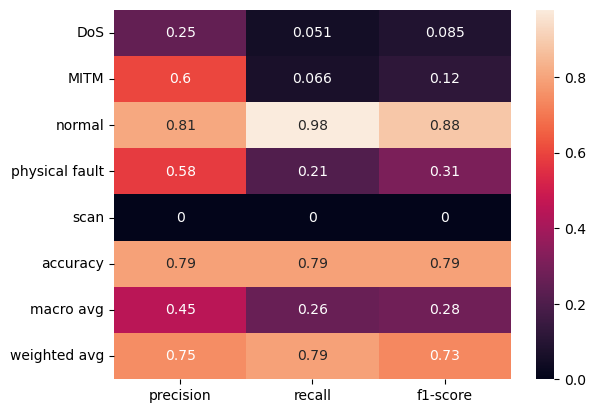

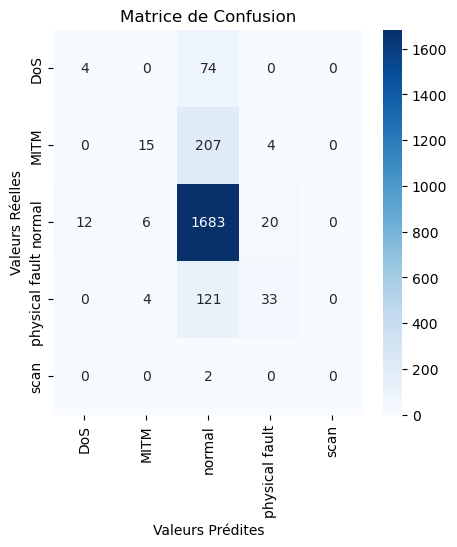

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



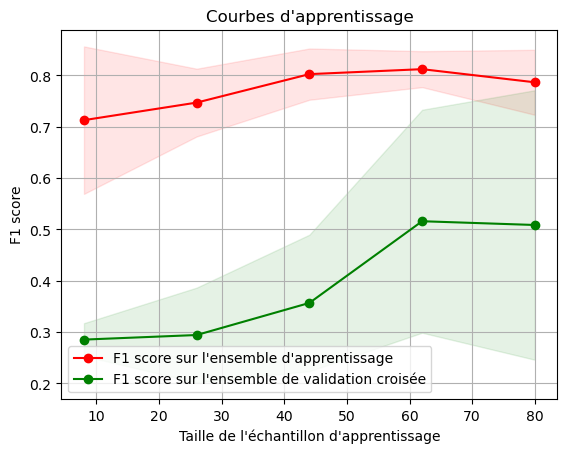

FIT TIME
1
PRED TIME
1
svm_size_1000
svm: Accuracy = 0.8604118993135011




/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



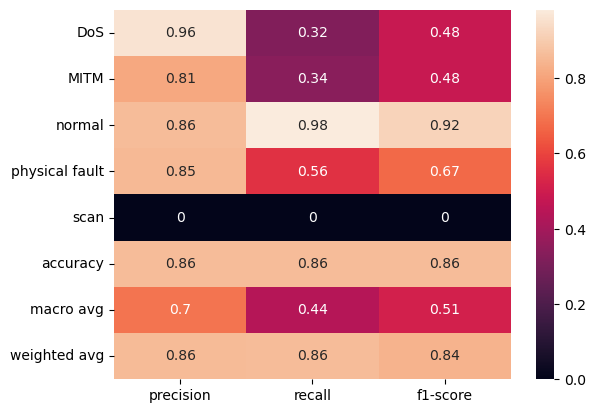

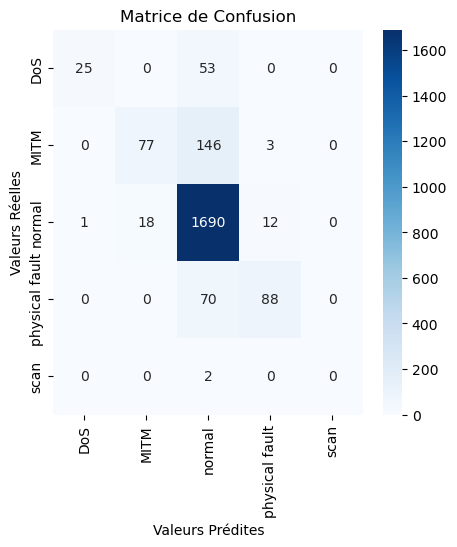

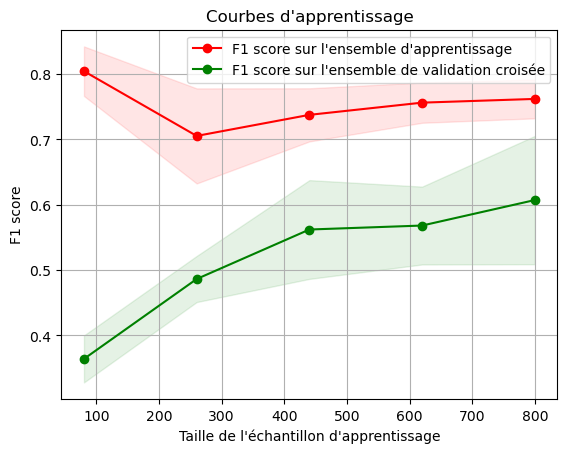

FIT TIME
1
PRED TIME
1
svm_size_10000
svm: Accuracy = 0.9148741418764302




/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



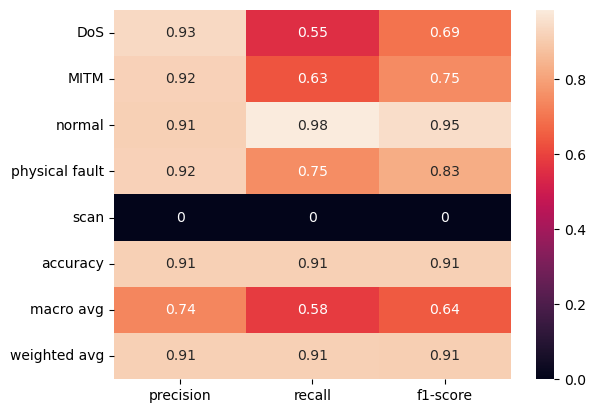

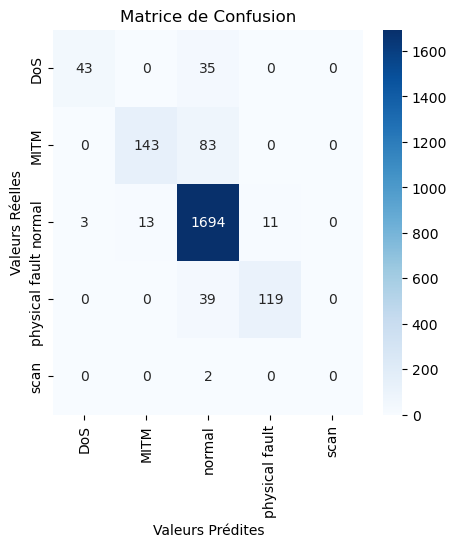

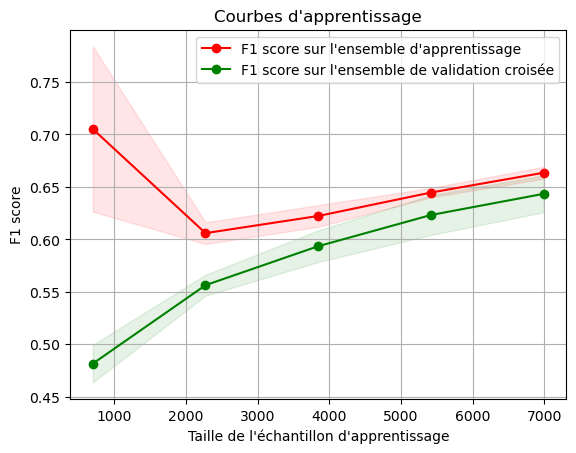

{'svm_size_100': {'svm': SVC(degree=5, kernel='poly')},
 'svm_size_1000': {'svm': SVC(degree=5, kernel='poly')},
 'svm_size_10000': {'svm': SVC(degree=5, kernel='poly')}}

In [45]:
evaluate_models(DataSet_all, "all")

FIT TIME
1
PRED TIME
1
svm_size_100
svm: Accuracy = 0.805224564619615




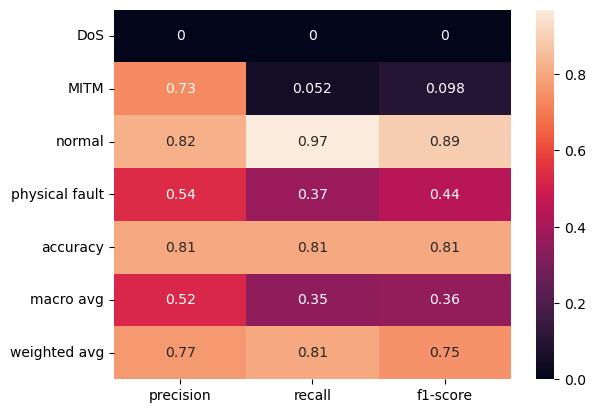

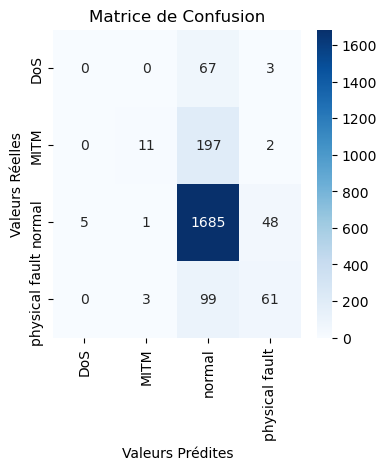

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.



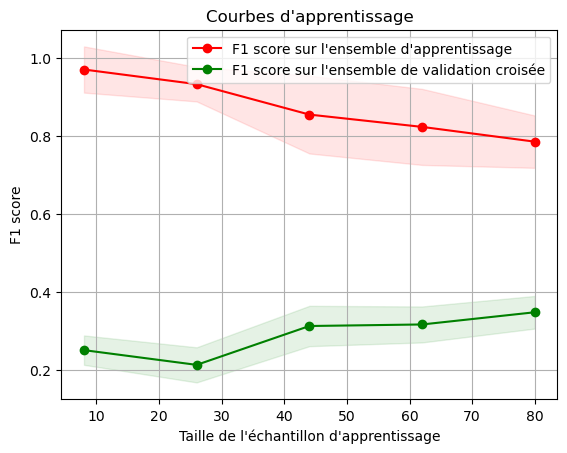

FIT TIME
1
PRED TIME
1
cart_size_100
cart: Accuracy = 0.7566452795600367


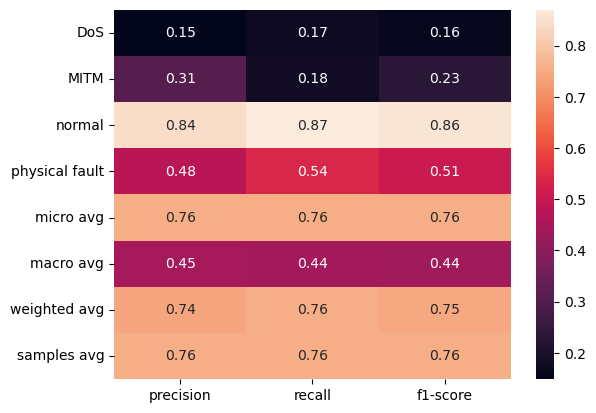

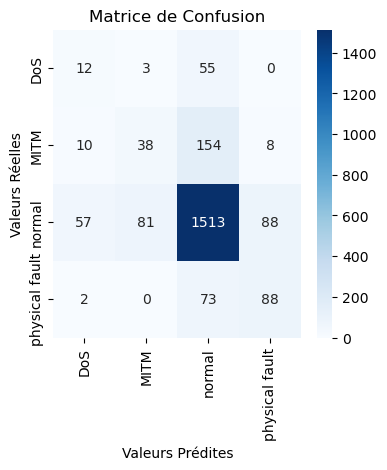

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no t

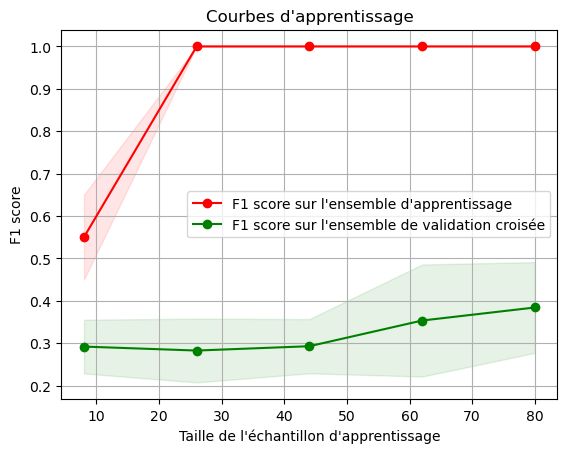

FIT TIME
9
PRED TIME
1
xgb_size_100
xgb: Accuracy = 0.7575618698441796


/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



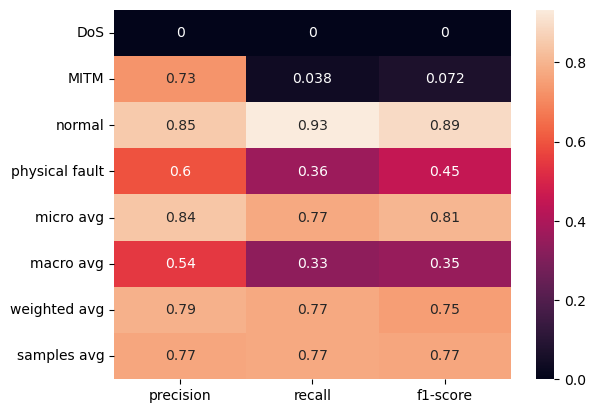

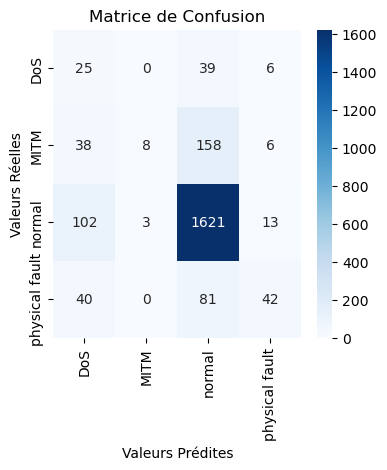

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no t

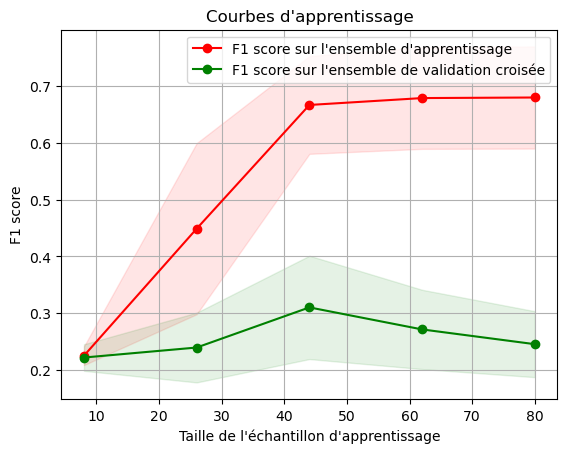

FIT TIME
1
PRED TIME
1
knn_size_100
knn: Accuracy = 0.7786434463794684


/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



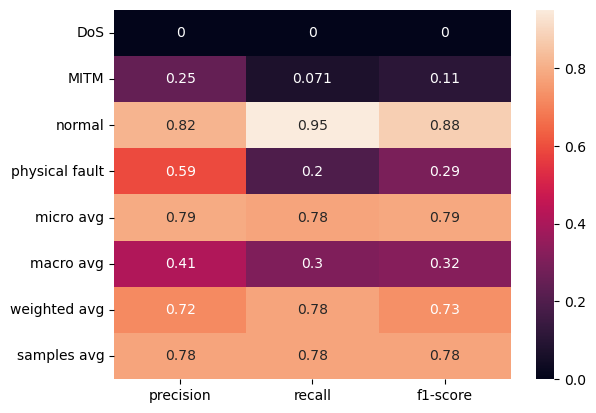

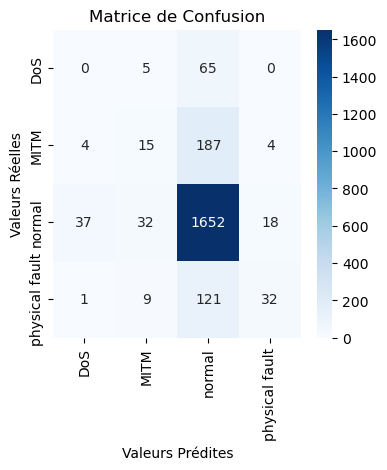

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no t

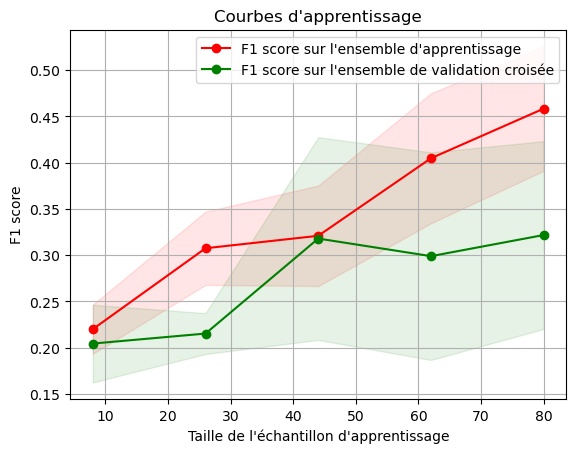

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/neural

FIT TIME
2
PRED TIME
1
mlp_size_100
mlp: Accuracy = 0.7589367552703942


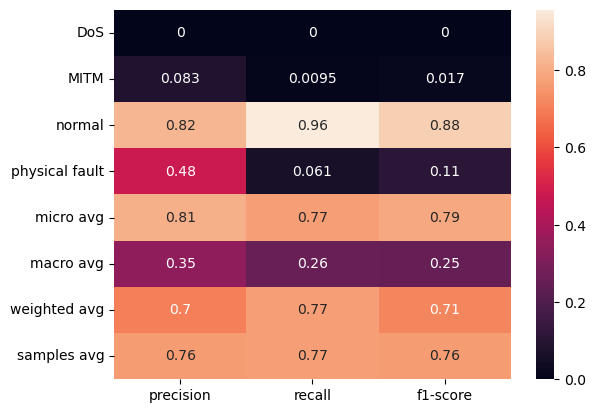

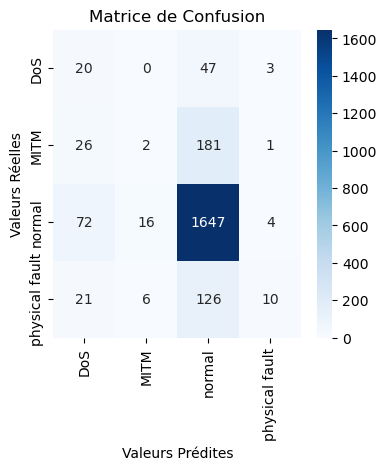

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/adhome/o/ob/oblandet/.local/lib/

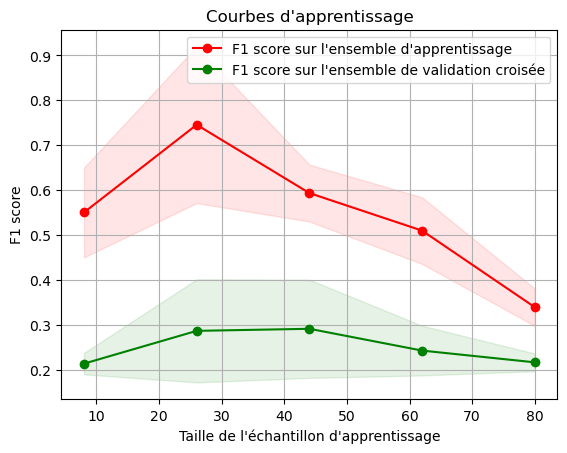

FIT TIME
7
PRED TIME
1
randomForest_size_100
randomForest: Accuracy = 0.8171402383134739


/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



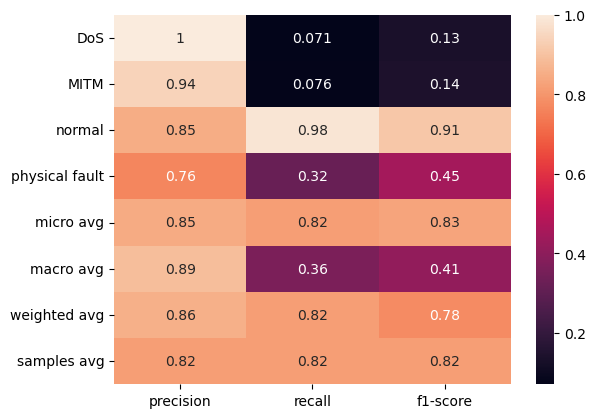

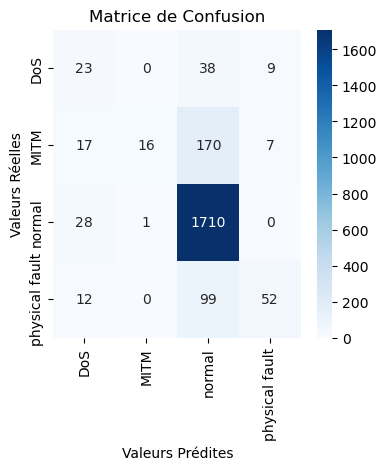

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no t

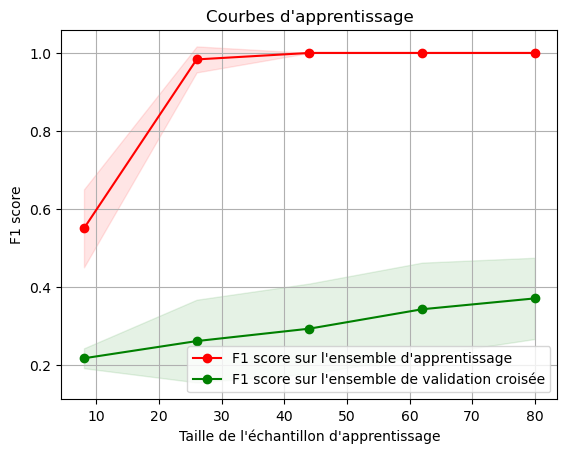

FIT TIME
1
PRED TIME
1
svm_size_1000
svm: Accuracy = 0.8551787351054079




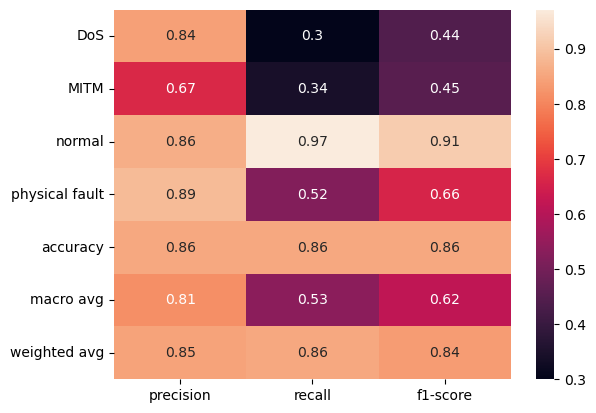

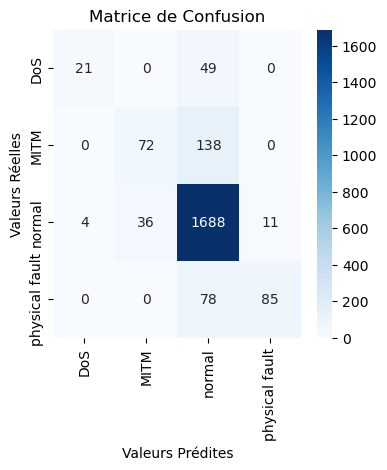

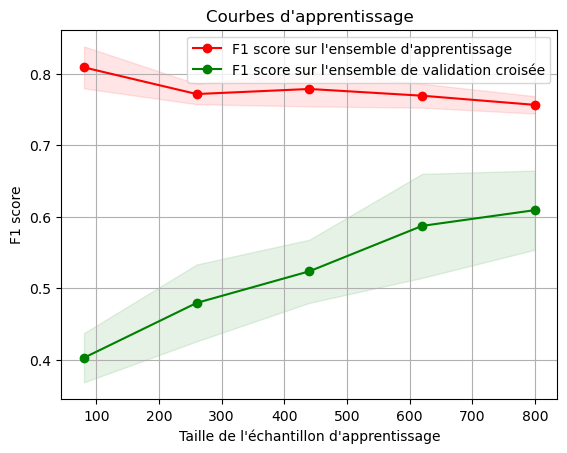

FIT TIME
1
PRED TIME
1
cart_size_1000
cart: Accuracy = 0.8863428047662695


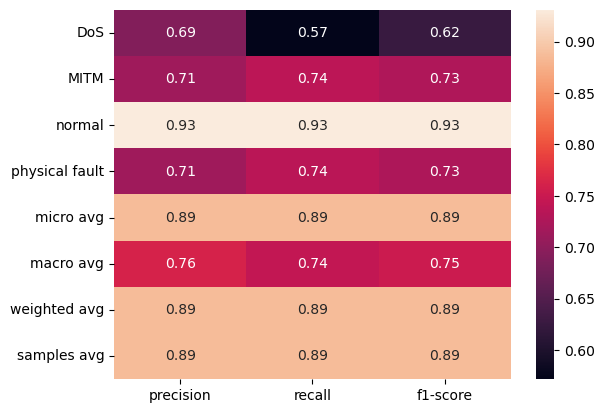

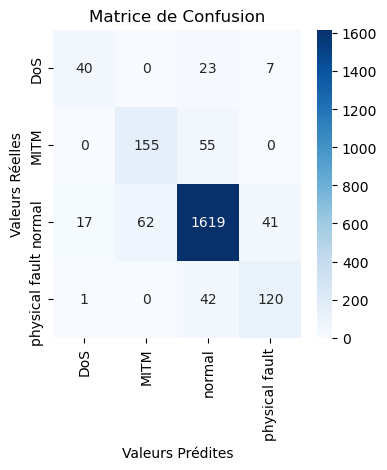

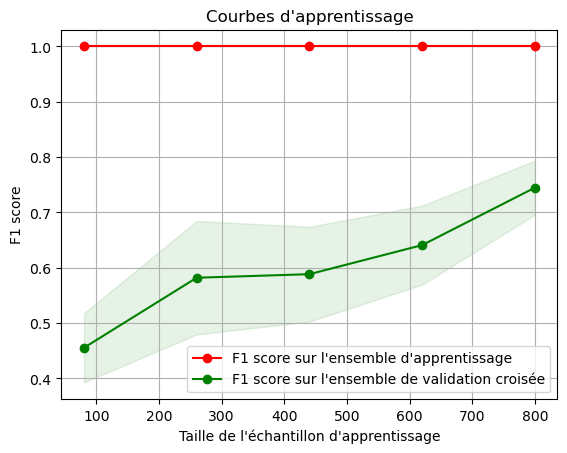

FIT TIME
20
PRED TIME
1
xgb_size_1000
xgb: Accuracy = 0.8785517873510541


/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



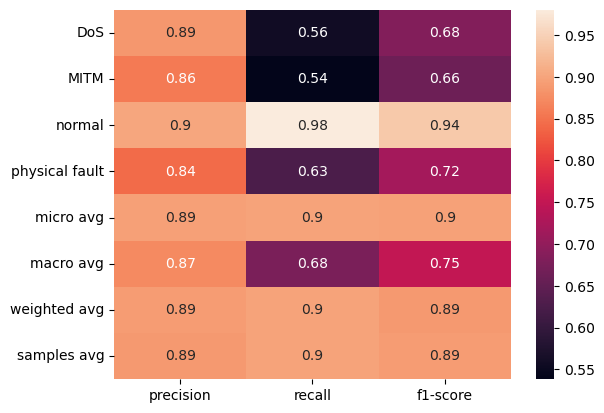

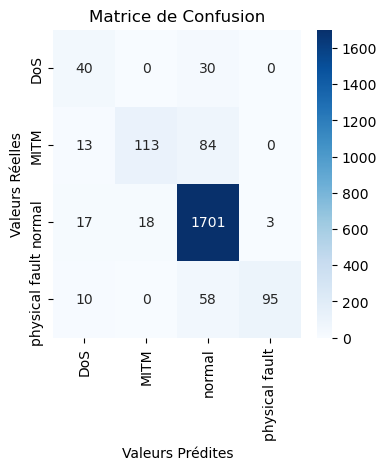

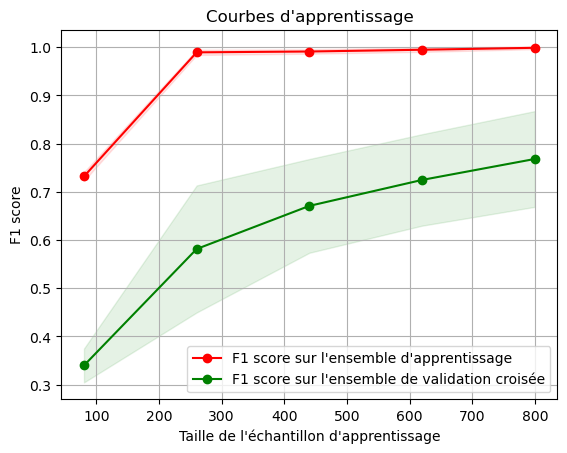

FIT TIME
1
PRED TIME
1
knn_size_1000
knn: Accuracy = 0.8652612282309807


/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



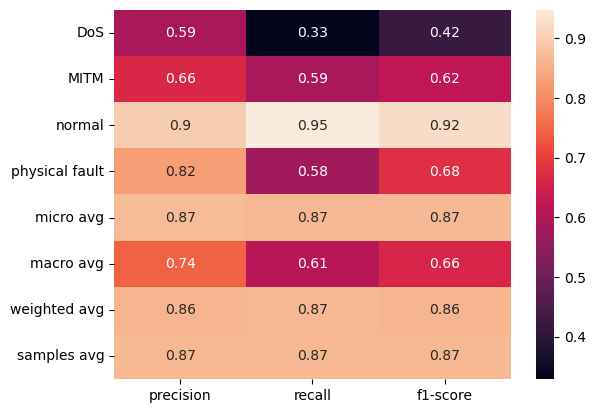

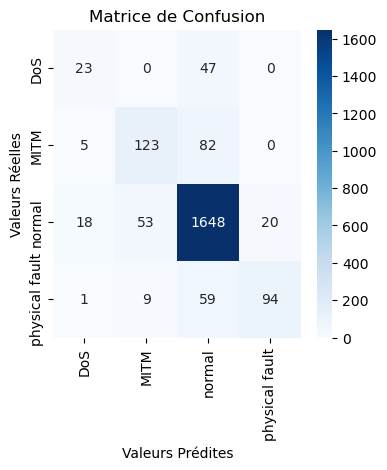

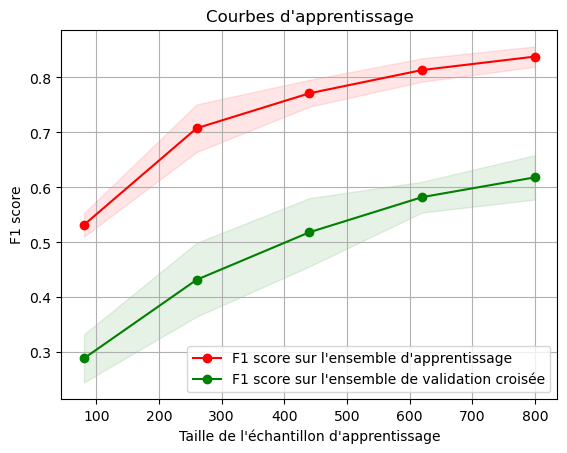

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/neural

FIT TIME
7
PRED TIME
1
mlp_size_1000
mlp: Accuracy = 0.8198900091659028


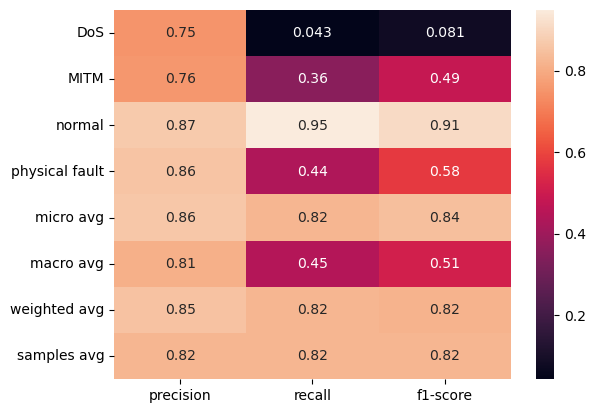

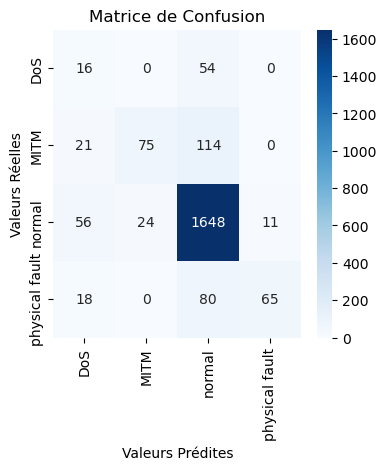

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/neural

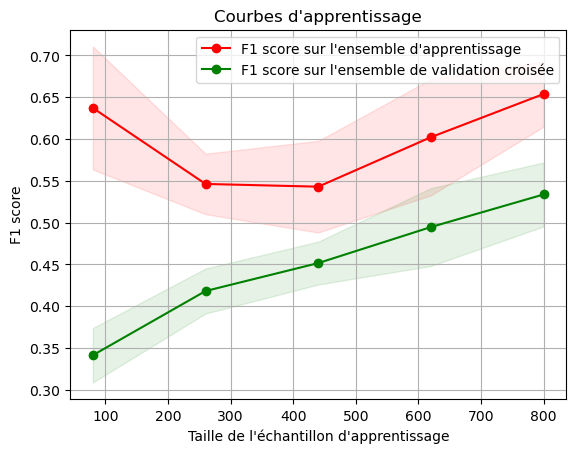

FIT TIME
13
PRED TIME
1
randomForest_size_1000
randomForest: Accuracy = 0.8991750687442713


/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



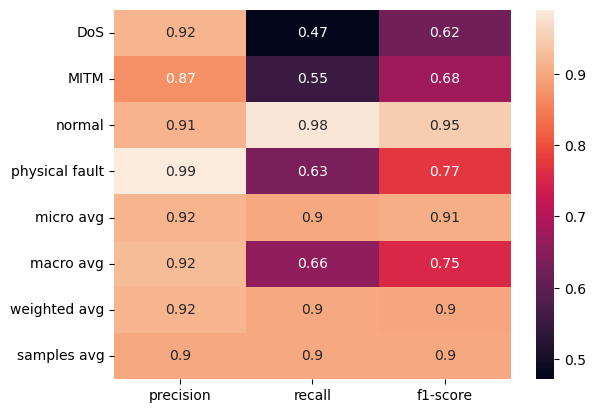

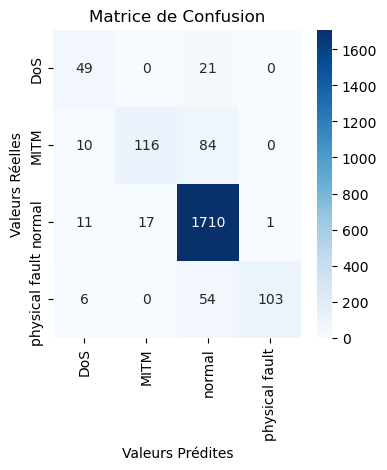

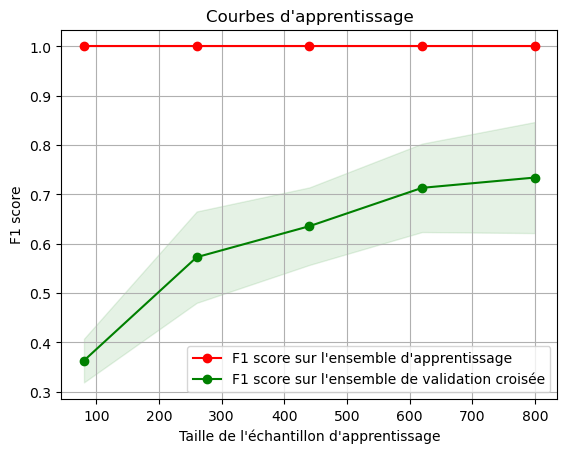

FIT TIME
1
PRED TIME
1
svm_size_10000
svm: Accuracy = 0.9152153987167736




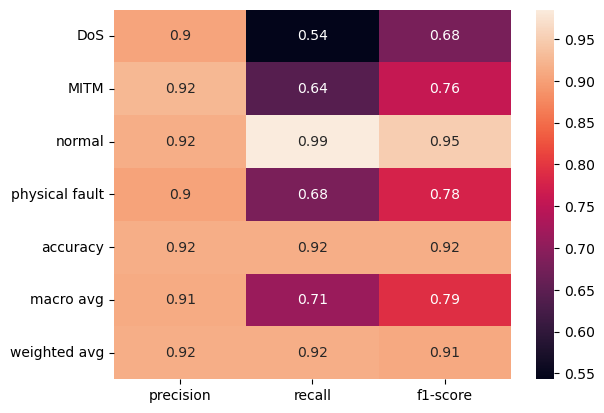

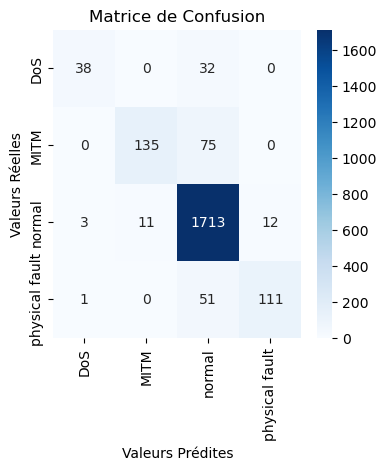

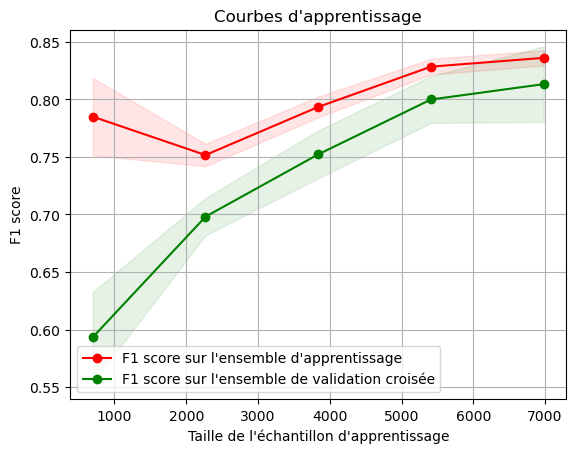

FIT TIME
4
PRED TIME
1
cart_size_10000
cart: Accuracy = 0.9697525206232814


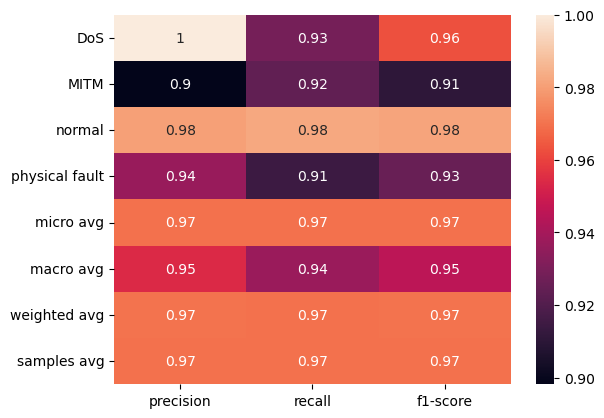

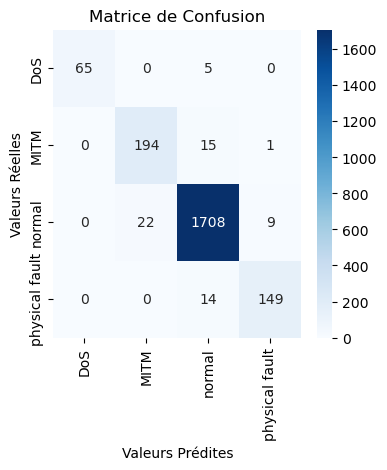

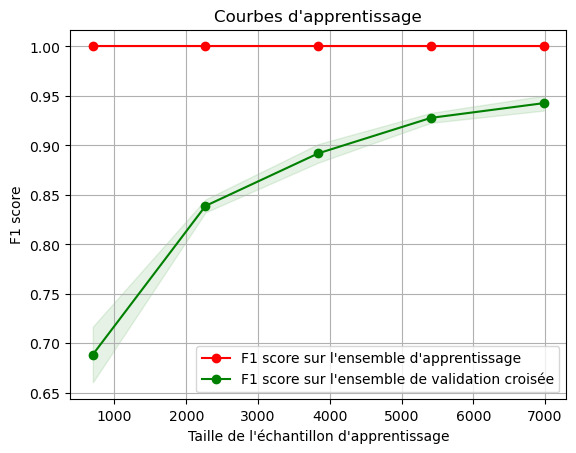

FIT TIME
36
PRED TIME
1
xgb_size_10000
xgb: Accuracy = 0.9802933088909258


/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



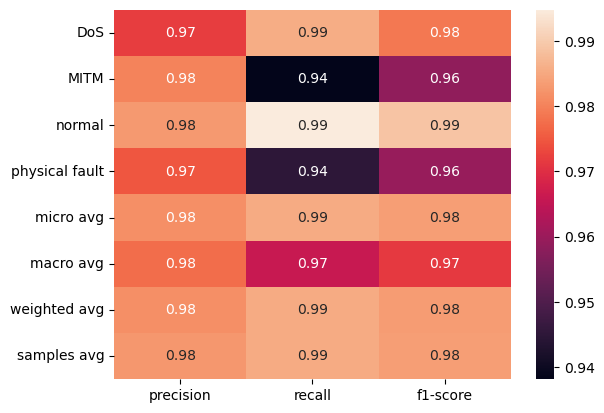

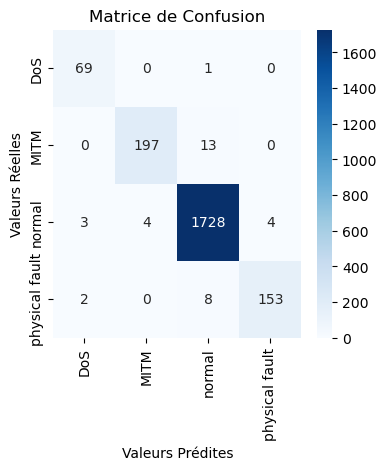

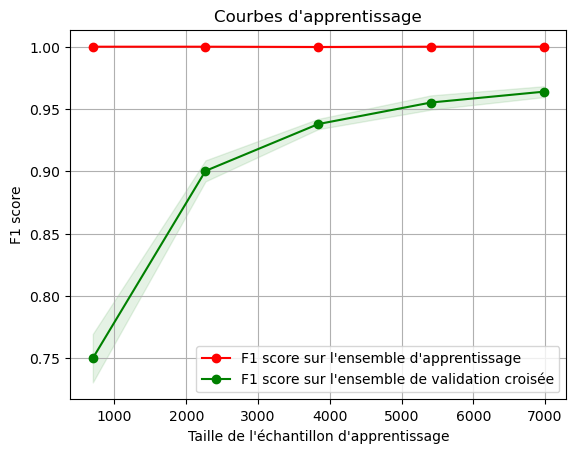

FIT TIME
3
PRED TIME
1
knn_size_10000
knn: Accuracy = 0.9780018331805683


/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



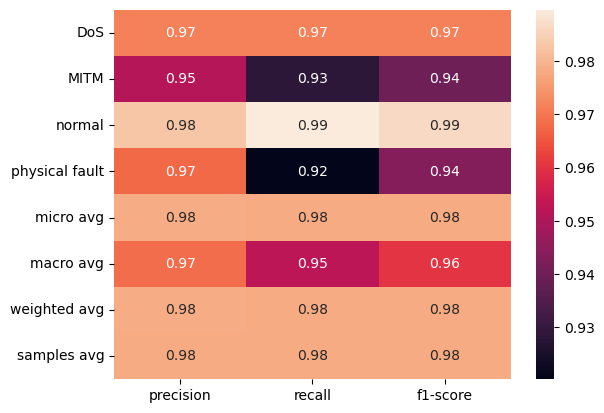

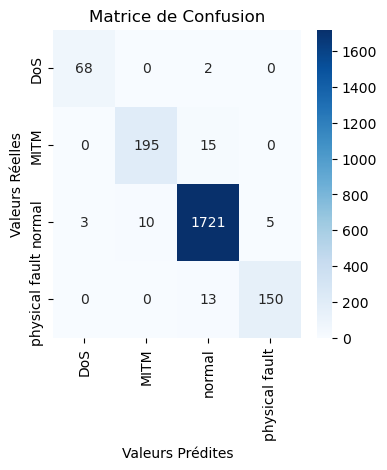

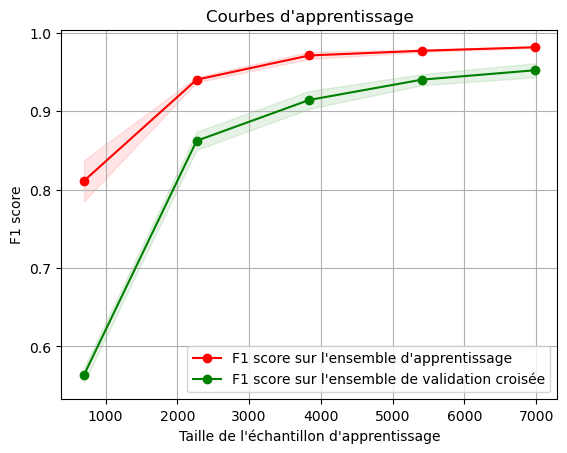

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/neural

FIT TIME
59
PRED TIME
1
mlp_size_10000
mlp: Accuracy = 0.9326306141154904


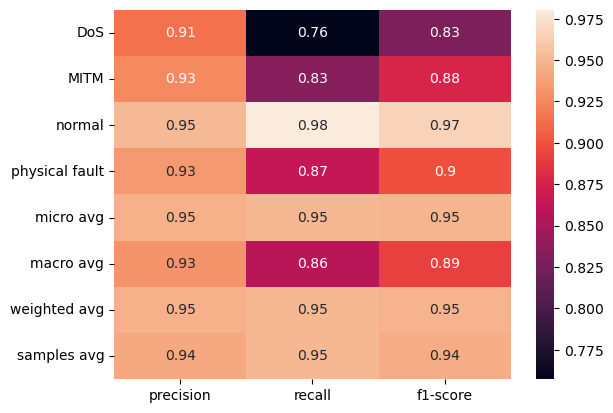

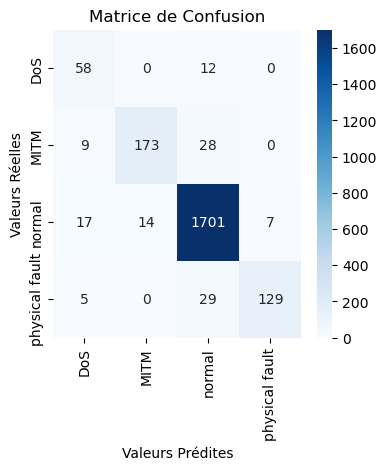

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/neural

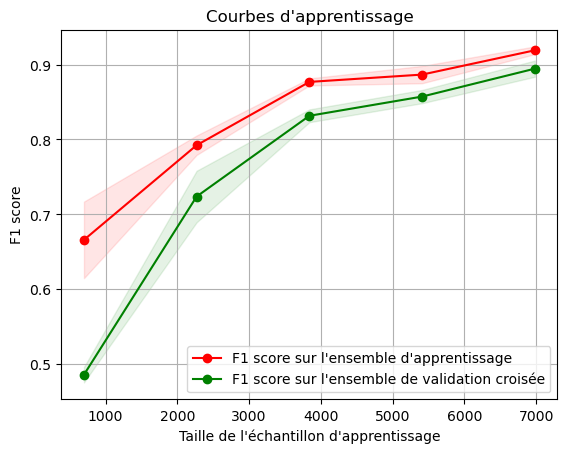

FIT TIME
54
PRED TIME
1
randomForest_size_10000
randomForest: Accuracy = 0.9825847846012832


/adhome/o/ob/oblandet/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



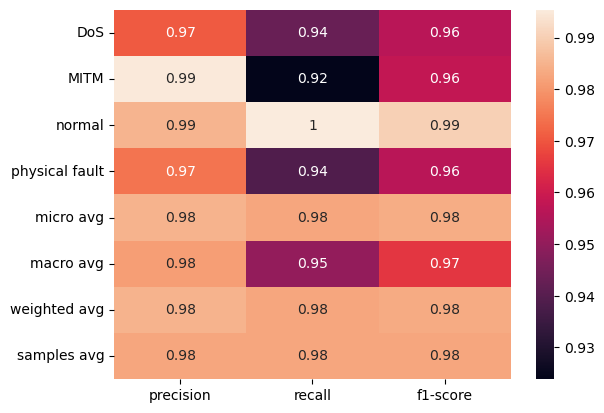

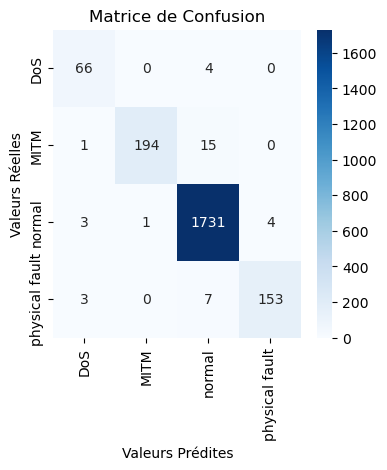

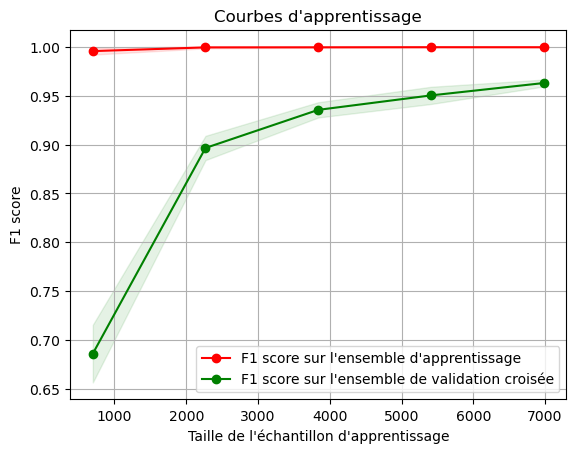

{'svm_size_100': {'svm': SVC(degree=5, kernel='poly')},
 'cart_size_100': {'cart': DecisionTreeClassifier(max_depth=20)},
 'xgb_size_100': {'xgb': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.1, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=5, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=200, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...)},
 'knn_size_100': {'knn': KNeighborsClassifier(n_neighbors=3)},
 'mlp_size_100'

In [47]:
evaluate_models(DataSet_noscan, "noscan")



data SIZE: 100


svm_size_100
svm: Accuracy = 0.7955699123211813


                precision    recall  f1-score   support

           DoS       0.95      0.36      0.52        59
          MITM       0.25      0.16      0.19       187
        normal       0.85      0.93      0.89      1785
physical fault       0.24      0.13      0.17       136

      accuracy                           0.80      2167
     macro avg       0.57      0.39      0.44      2167
  weighted avg       0.76      0.80      0.77      2167



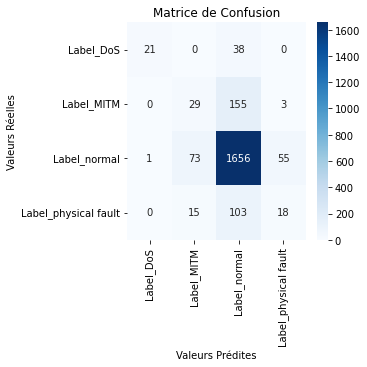

cart_size_100
cart: Accuracy = 0.7508075680664513


              precision    recall  f1-score   support

           0       0.37      0.49      0.42        59
           1       0.31      0.32      0.32       187
           2       0.89      0.83      0.86      1785
           3       0.22      0.38      0.28       136

   micro avg       0.75      0.75      0.75      2167
   macro avg       0.45      0.51      0.47      2167
weighted avg       0.79      0.75      0.77      2167
 samples avg       0.75      0.75      0.75      2167



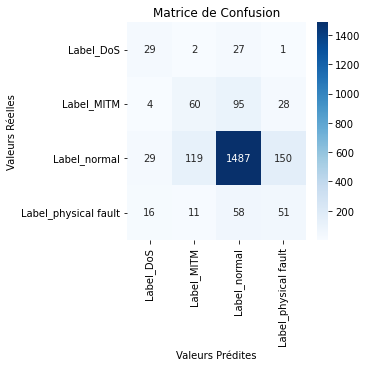

xgb_size_100
xgb: Accuracy = 0.7374250115366867


              precision    recall  f1-score   support

           0       1.00      0.03      0.07        59
           1       0.23      0.16      0.19       187
           2       0.85      0.90      0.87      1785
           3       0.50      0.01      0.03       136

   micro avg       0.81      0.76      0.78      2167
   macro avg       0.64      0.28      0.29      2167
weighted avg       0.78      0.76      0.74      2167
 samples avg       0.75      0.76      0.75      2167



c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



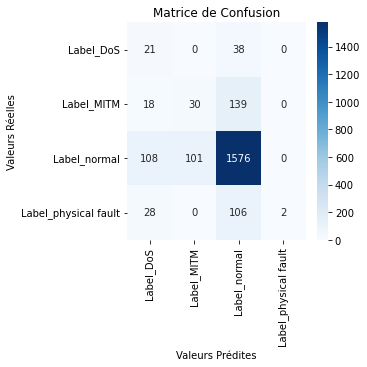

knn_size_100
knn: Accuracy = 0.8103368712505769


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.00      0.00      0.00       187
           2       0.82      0.98      0.90      1785
           3       0.00      0.00      0.00       136

   micro avg       0.82      0.81      0.82      2167
   macro avg       0.21      0.25      0.22      2167
weighted avg       0.68      0.81      0.74      2167
 samples avg       0.81      0.81      0.81      2167



c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



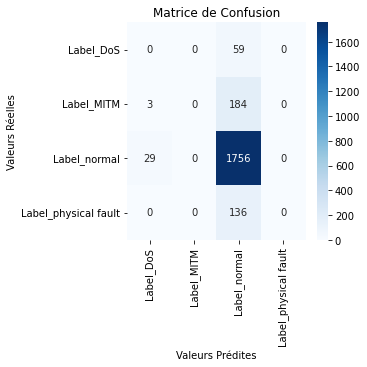

c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

mlp_size_100
mlp: Accuracy = 0.7951084448546377


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.00      0.00      0.00       187
           2       0.84      0.97      0.90      1785
           3       0.00      0.00      0.00       136

   micro avg       0.83      0.80      0.81      2167
   macro avg       0.21      0.24      0.22      2167
weighted avg       0.69      0.80      0.74      2167
 samples avg       0.80      0.80      0.80      2167



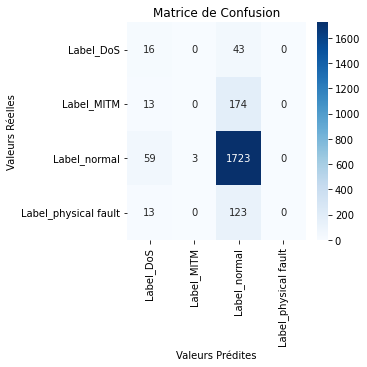

randomForest_size_100
randomForest: Accuracy = 0.8144900784494693


              precision    recall  f1-score   support

           0       0.93      0.24      0.38        59
           1       0.49      0.15      0.23       187
           2       0.86      0.96      0.91      1785
           3       1.00      0.04      0.07       136

   micro avg       0.85      0.81      0.83      2167
   macro avg       0.82      0.35      0.40      2167
weighted avg       0.84      0.81      0.78      2167
 samples avg       0.81      0.81      0.81      2167



c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



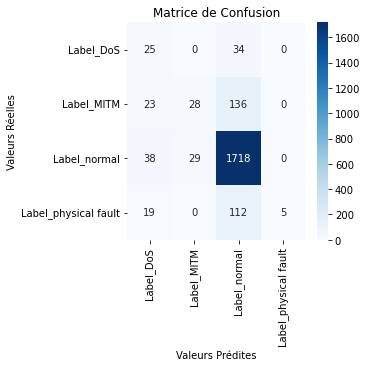



data SIZE: 1000


svm_size_1000
svm: Accuracy = 0.8754037840332256


                precision    recall  f1-score   support

           DoS       0.86      0.42      0.57        59
          MITM       0.69      0.40      0.51       187
        normal       0.88      0.98      0.93      1785
physical fault       0.90      0.38      0.54       136

      accuracy                           0.88      2167
     macro avg       0.83      0.55      0.64      2167
  weighted avg       0.87      0.88      0.86      2167



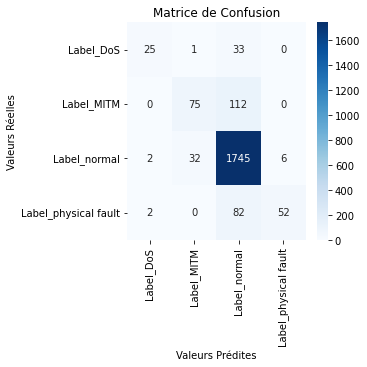

cart_size_1000
cart: Accuracy = 0.9100138440239963


              precision    recall  f1-score   support

           0       0.62      0.63      0.62        59
           1       0.73      0.73      0.73       187
           2       0.95      0.95      0.95      1785
           3       0.82      0.79      0.81       136

   micro avg       0.91      0.91      0.91      2167
   macro avg       0.78      0.78      0.78      2167
weighted avg       0.91      0.91      0.91      2167
 samples avg       0.91      0.91      0.91      2167



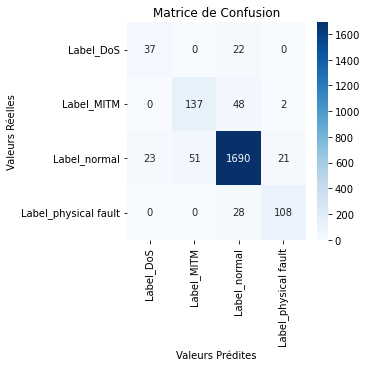

xgb_size_1000
xgb: Accuracy = 0.9141670512228888


              precision    recall  f1-score   support

           0       0.85      0.76      0.80        59
           1       0.89      0.71      0.79       187
           2       0.94      0.97      0.96      1785
           3       0.91      0.74      0.82       136

   micro avg       0.93      0.93      0.93      2167
   macro avg       0.90      0.80      0.84      2167
weighted avg       0.93      0.93      0.93      2167
 samples avg       0.92      0.93      0.92      2167



c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



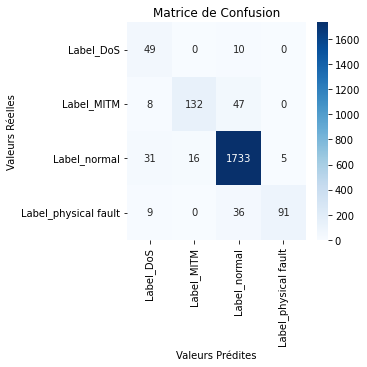

knn_size_1000
knn: Accuracy = 0.8763267189663129


              precision    recall  f1-score   support

           0       0.54      0.76      0.63        59
           1       0.69      0.54      0.60       187
           2       0.92      0.94      0.93      1785
           3       0.79      0.54      0.64       136

   micro avg       0.88      0.88      0.88      2167
   macro avg       0.74      0.70      0.70      2167
weighted avg       0.88      0.88      0.88      2167
 samples avg       0.88      0.88      0.88      2167



c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



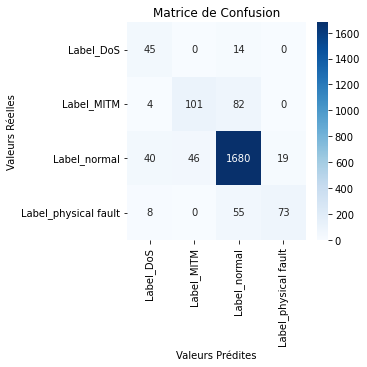

c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

mlp_size_1000
mlp: Accuracy = 0.8555606829718505


              precision    recall  f1-score   support

           0       0.76      0.32      0.45        59
           1       0.75      0.44      0.55       187
           2       0.90      0.96      0.93      1785
           3       0.86      0.31      0.45       136

   micro avg       0.89      0.86      0.87      2167
   macro avg       0.82      0.51      0.60      2167
weighted avg       0.88      0.86      0.85      2167
 samples avg       0.86      0.86      0.86      2167



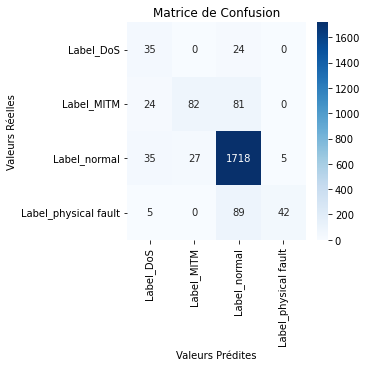

randomForest_size_1000
randomForest: Accuracy = 0.9173973234886941


              precision    recall  f1-score   support

           0       0.87      0.69      0.77        59
           1       0.86      0.59      0.70       187
           2       0.94      0.98      0.96      1785
           3       0.96      0.66      0.78       136

   micro avg       0.94      0.92      0.93      2167
   macro avg       0.91      0.73      0.80      2167
weighted avg       0.93      0.92      0.92      2167
 samples avg       0.92      0.92      0.92      2167



c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



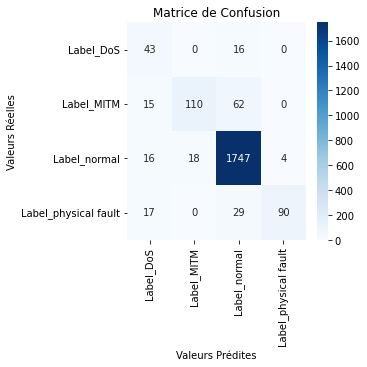



data SIZE: 10000


svm_size_10000
svm: Accuracy = 0.9252422704199353


                precision    recall  f1-score   support

           DoS       0.74      0.78      0.76        59
          MITM       0.89      0.63      0.74       187
        normal       0.93      0.98      0.96      1785
physical fault       0.94      0.62      0.75       136

      accuracy                           0.93      2167
     macro avg       0.88      0.75      0.80      2167
  weighted avg       0.92      0.93      0.92      2167



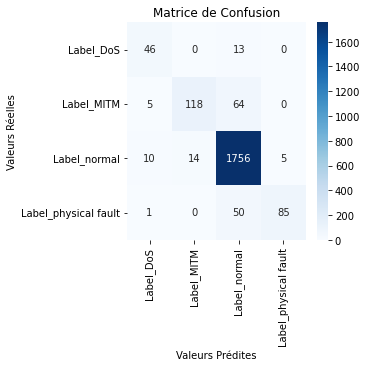

cart_size_10000
cart: Accuracy = 0.9695431472081218


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        59
           1       0.89      0.89      0.89       187
           2       0.98      0.98      0.98      1785
           3       0.95      0.89      0.92       136

   micro avg       0.97      0.97      0.97      2167
   macro avg       0.95      0.93      0.94      2167
weighted avg       0.97      0.97      0.97      2167
 samples avg       0.97      0.97      0.97      2167



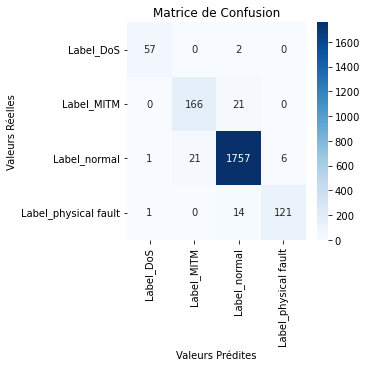

xgb_size_10000
xgb: Accuracy = 0.9773880941393632


              precision    recall  f1-score   support

           0       0.98      0.93      0.96        59
           1       0.93      0.91      0.92       187
           2       0.99      0.99      0.99      1785
           3       0.98      0.97      0.97       136

   micro avg       0.98      0.98      0.98      2167
   macro avg       0.97      0.95      0.96      2167
weighted avg       0.98      0.98      0.98      2167
 samples avg       0.98      0.98      0.98      2167



c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



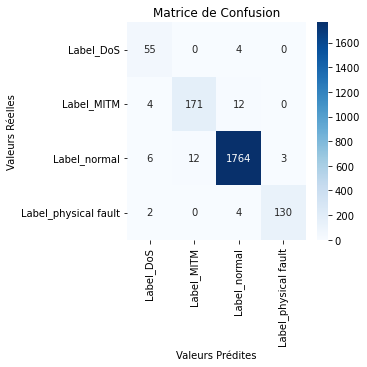

knn_size_10000
knn: Accuracy = 0.9773880941393632


              precision    recall  f1-score   support

           0       0.95      0.95      0.95        59
           1       0.92      0.95      0.93       187
           2       0.99      0.99      0.99      1785
           3       0.95      0.93      0.94       136

   micro avg       0.98      0.98      0.98      2167
   macro avg       0.95      0.95      0.95      2167
weighted avg       0.98      0.98      0.98      2167
 samples avg       0.98      0.98      0.98      2167



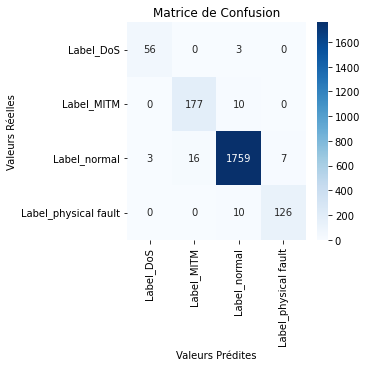

c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

mlp_size_10000
mlp: Accuracy = 0.9450853714813106


              precision    recall  f1-score   support

           0       0.84      0.81      0.83        59
           1       0.95      0.78      0.86       187
           2       0.96      0.98      0.97      1785
           3       0.94      0.90      0.92       136

   micro avg       0.96      0.95      0.96      2167
   macro avg       0.92      0.87      0.89      2167
weighted avg       0.96      0.95      0.96      2167
 samples avg       0.95      0.95      0.95      2167



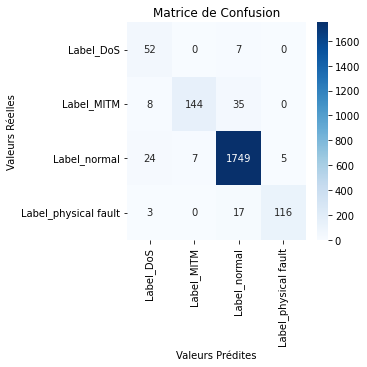

randomForest_size_10000
randomForest: Accuracy = 0.9829257037378865


              precision    recall  f1-score   support

           0       1.00      0.93      0.96        59
           1       0.96      0.92      0.94       187
           2       0.99      0.99      0.99      1785
           3       0.97      0.96      0.97       136

   micro avg       0.98      0.98      0.98      2167
   macro avg       0.98      0.95      0.96      2167
weighted avg       0.98      0.98      0.98      2167
 samples avg       0.98      0.98      0.98      2167



c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



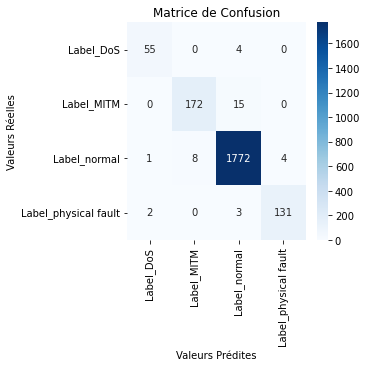



data SIZE: 100000


svm_size_100000
svm: Accuracy = 0.9252422704199353


                precision    recall  f1-score   support

           DoS       0.74      0.78      0.76        59
          MITM       0.89      0.63      0.74       187
        normal       0.93      0.98      0.96      1785
physical fault       0.94      0.62      0.75       136

      accuracy                           0.93      2167
     macro avg       0.88      0.75      0.80      2167
  weighted avg       0.92      0.93      0.92      2167



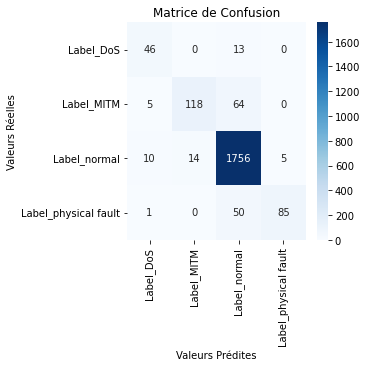

cart_size_100000
cart: Accuracy = 0.972773419473927


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        59
           1       0.89      0.91      0.90       187
           2       0.98      0.99      0.98      1785
           3       0.96      0.90      0.93       136

   micro avg       0.97      0.97      0.97      2167
   macro avg       0.95      0.94      0.94      2167
weighted avg       0.97      0.97      0.97      2167
 samples avg       0.97      0.97      0.97      2167



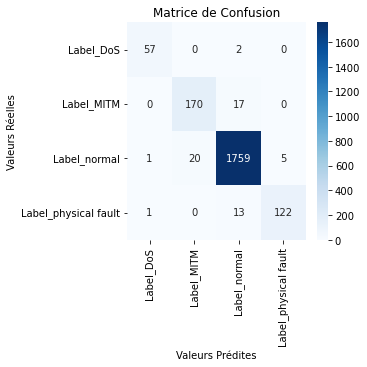

xgb_size_100000
xgb: Accuracy = 0.9773880941393632


              precision    recall  f1-score   support

           0       0.98      0.93      0.96        59
           1       0.93      0.91      0.92       187
           2       0.99      0.99      0.99      1785
           3       0.98      0.97      0.97       136

   micro avg       0.98      0.98      0.98      2167
   macro avg       0.97      0.95      0.96      2167
weighted avg       0.98      0.98      0.98      2167
 samples avg       0.98      0.98      0.98      2167



c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



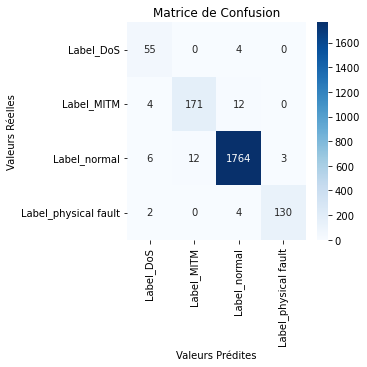

knn_size_100000
knn: Accuracy = 0.9773880941393632


              precision    recall  f1-score   support

           0       0.95      0.95      0.95        59
           1       0.92      0.95      0.93       187
           2       0.99      0.99      0.99      1785
           3       0.95      0.93      0.94       136

   micro avg       0.98      0.98      0.98      2167
   macro avg       0.95      0.95      0.95      2167
weighted avg       0.98      0.98      0.98      2167
 samples avg       0.98      0.98      0.98      2167



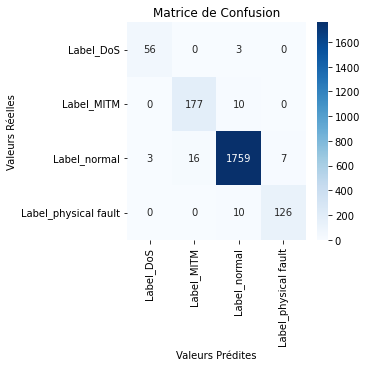

c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

mlp_size_100000
mlp: Accuracy = 0.9441624365482234


              precision    recall  f1-score   support

           0       0.89      0.83      0.86        59
           1       0.90      0.82      0.86       187
           2       0.96      0.98      0.97      1785
           3       0.94      0.87      0.90       136

   micro avg       0.96      0.96      0.96      2167
   macro avg       0.92      0.87      0.90      2167
weighted avg       0.96      0.96      0.96      2167
 samples avg       0.95      0.96      0.95      2167



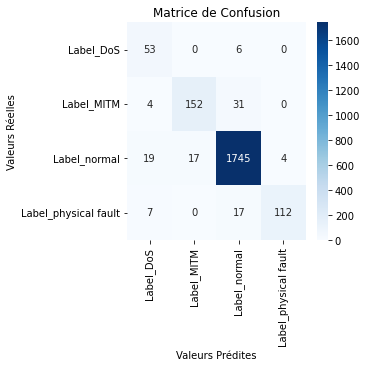

randomForest_size_100000
randomForest: Accuracy = 0.9815413013382557


              precision    recall  f1-score   support

           0       0.98      0.93      0.96        59
           1       0.95      0.90      0.93       187
           2       0.99      0.99      0.99      1785
           3       0.98      0.97      0.97       136

   micro avg       0.98      0.98      0.98      2167
   macro avg       0.97      0.95      0.96      2167
weighted avg       0.98      0.98      0.98      2167
 samples avg       0.98      0.98      0.98      2167



c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



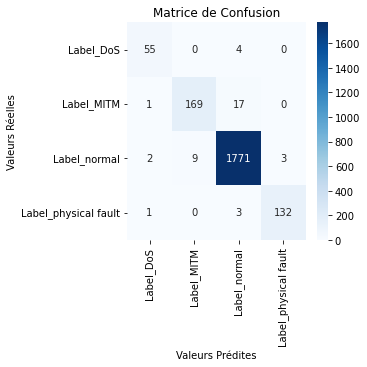



data SIZE: 1000000


svm_size_1000000
svm: Accuracy = 0.9252422704199353


                precision    recall  f1-score   support

           DoS       0.74      0.78      0.76        59
          MITM       0.89      0.63      0.74       187
        normal       0.93      0.98      0.96      1785
physical fault       0.94      0.62      0.75       136

      accuracy                           0.93      2167
     macro avg       0.88      0.75      0.80      2167
  weighted avg       0.92      0.93      0.92      2167



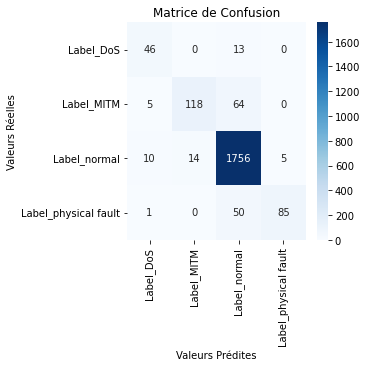

cart_size_1000000
cart: Accuracy = 0.9713890170742963


              precision    recall  f1-score   support

           0       0.95      0.97      0.96        59
           1       0.91      0.89      0.90       187
           2       0.98      0.98      0.98      1785
           3       0.96      0.90      0.93       136

   micro avg       0.97      0.97      0.97      2167
   macro avg       0.95      0.94      0.94      2167
weighted avg       0.97      0.97      0.97      2167
 samples avg       0.97      0.97      0.97      2167



c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



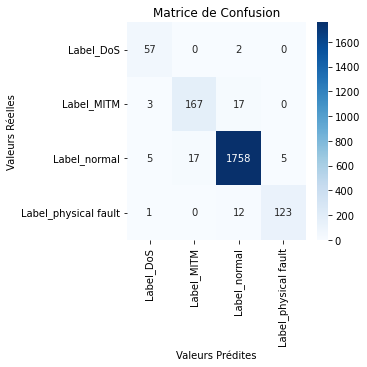

xgb_size_1000000
xgb: Accuracy = 0.9773880941393632


              precision    recall  f1-score   support

           0       0.98      0.93      0.96        59
           1       0.93      0.91      0.92       187
           2       0.99      0.99      0.99      1785
           3       0.98      0.97      0.97       136

   micro avg       0.98      0.98      0.98      2167
   macro avg       0.97      0.95      0.96      2167
weighted avg       0.98      0.98      0.98      2167
 samples avg       0.98      0.98      0.98      2167



c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



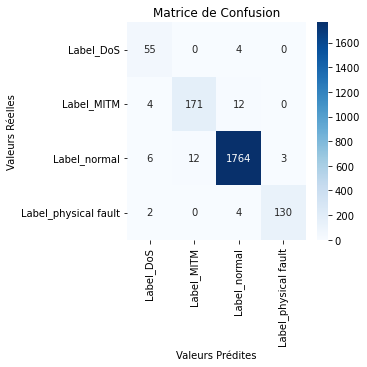

knn_size_1000000
knn: Accuracy = 0.9773880941393632


              precision    recall  f1-score   support

           0       0.95      0.95      0.95        59
           1       0.92      0.95      0.93       187
           2       0.99      0.99      0.99      1785
           3       0.95      0.93      0.94       136

   micro avg       0.98      0.98      0.98      2167
   macro avg       0.95      0.95      0.95      2167
weighted avg       0.98      0.98      0.98      2167
 samples avg       0.98      0.98      0.98      2167



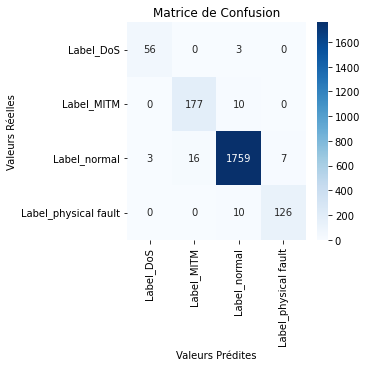

c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

mlp_size_1000000
mlp: Accuracy = 0.9437009690816798


              precision    recall  f1-score   support

           0       0.79      0.83      0.81        59
           1       0.91      0.84      0.87       187
           2       0.97      0.98      0.97      1785
           3       0.94      0.90      0.92       136

   micro avg       0.96      0.96      0.96      2167
   macro avg       0.90      0.89      0.89      2167
weighted avg       0.96      0.96      0.96      2167
 samples avg       0.95      0.96      0.95      2167



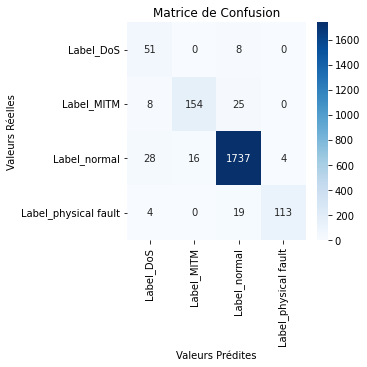

randomForest_size_1000000
randomForest: Accuracy = 0.9801568989386248


              precision    recall  f1-score   support

           0       1.00      0.93      0.96        59
           1       0.94      0.90      0.92       187
           2       0.99      0.99      0.99      1785
           3       0.97      0.97      0.97       136

   micro avg       0.98      0.98      0.98      2167
   macro avg       0.97      0.95      0.96      2167
weighted avg       0.98      0.98      0.98      2167
 samples avg       0.98      0.98      0.98      2167



c:\Users\DIAKITE MARIAM\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



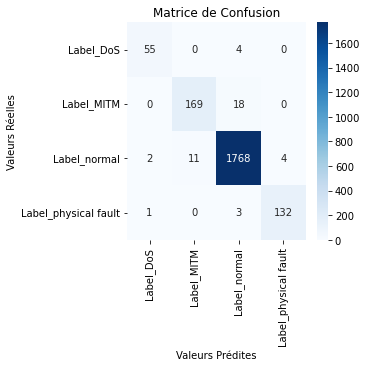

{'svm_size_100': {'svm': SVC(degree=5, kernel='poly')},
 'cart_size_100': {'cart': GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
               param_grid={'max_depth': [None, 10, 20, 30],
                           'min_samples_split': [2, 5, 10]})},
 'xgb_size_100': {'xgb': GridSearchCV(cv=5,
               estimator=XGBClassifier(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bynode=None,
                                       colsample_bytree=None, device=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False, eval_metric=None,
                                       feature_types=None, gamma=None,
                                       grow_policy=None, importance_type=None,
                                       interaction_constraints=None,
                                       l

In [73]:
evaluate_models(DataSet_drop, "drop")